In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr, ttest_ind, ttest_rel, mannwhitneyu, shapiro, wilcoxon
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore") # ignore a warning related to tsplot()


Index(['Region', 'DOF', 'Tau2', 'Tau2SE', 'I2', 'H2', 'Qdf', 'Q', 'Qp',
       'estimate', 'se', 'zval', 'pval', 'ci.lb', 'ci.ub'],
      dtype='object')
Asy_L_SurfArea_asy.csv
0.05 63 0.9
Effect size: 0.41808081368876143 0.4214738957933708 0.00122992827650283 1.76176299875005
count    70.000000
mean      0.418081
std       0.421474
min       0.001230
25%       0.134768
50%       0.301917
75%       0.507302
max       1.761763
Name: estimate, dtype: float64


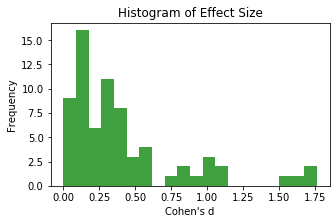

In [2]:
# A quick look at a random example meta data
excl_dataset = 'NUIG'
meta_f = u'./meta/sum_asy_meta_excl_'+excl_dataset+'.csv'
meta_dat = pd.read_csv(meta_f)
print(meta_dat.columns)

csv_list =  meta_dat[u'Region']
print(csv_list[0])
pthr_list = [0.05]
for pthr in pthr_list:
    print(pthr, np.sum(meta_dat[u'pval']<=pthr),\
    1.0*np.sum(meta_dat[u'pval']<=pthr)/meta_dat[u'pval'].count())
print('Effect size:', meta_dat[u'estimate'].abs().mean(), meta_dat[u'estimate'].abs().std(),\
        meta_dat[u'estimate'].abs().min(), meta_dat[u'estimate'].abs().max())
print(meta_dat[u'estimate'].abs().describe())

plt.figure(figsize=(5,3))
plt.hist(meta_dat[u'estimate'].abs(),facecolor='g', alpha=0.75, bins=20)
plt.xlabel('Cohen\'s d')
plt.ylabel('Frequency')
plt.title('Histogram of Effect Size')
plt.show()

#meta_dat[u'estimate_abs'] = np.abs(meta_dat[u'estimate'])
#meta_dat_ordered = meta_dat.sort_values(u'estimate_abs',axis=0)
#csv_list_ordered =  meta_dat_ordered[u'Region']


In [3]:
# construct the matrix for result consistency between single dataset and the meta results with all the other datasets.
dataset_info_file = './doc/dataset_info.csv'
dataset_info = pd.read_csv(dataset_info_file)

pthr_single = 0.05 # significance threshold
pthr = 0.05 # significance threshold for meta
#pthr = 0.05/70.0# meta threshold when considering multiple testing correction

dataset_by_region_mat = np.zeros((len(dataset_info['Dataset']),70)) 
# 1 for the same results (sig. & same direction, or all not sig.), otherwise 0 

dataset_by_region_mat2 = np.zeros((len(dataset_info['Dataset']),70)) 
# 1 for the same results (sig. & same direction), otherwise 0 

for j, dataset in enumerate(dataset_info['Dataset']):
    print(dataset)
    # read the meta results while excluding that dataset
    meta_f = u'./meta/sum_asy_meta_excl_'+dataset+'.csv'
    meta_dat = pd.read_csv(meta_f)
    meta_dat[u'estimate_abs'] = np.abs(meta_dat[u'estimate'])
    
    csv_list =  meta_dat[u'Region']
    for i, csv_f in enumerate(csv_list):
        meta_z = meta_dat[u'zval'][i] # meta effect for that region
        meta_p = meta_dat[u'pval'][i] # meta effect for that region
        csv_dat = pd.read_csv(os.path.join('./data/',csv_f))
        
        csv_dat = csv_dat[csv_dat['Dataset']==dataset]
        #print(meta_p, meta_z, csv_dat[u'p'].values[0], csv_dat[u't'].values[0])
        if (meta_p <=pthr) and (csv_dat[u'p'].values[0]<=pthr_single) and ((csv_dat[u't'].values[0]*meta_z)>0)==True: 
            # significant & same direction
            dataset_by_region_mat[j,i] = 1
        elif (meta_p >pthr) and (csv_dat[u'p'].values[0]>pthr_single): # both not sig.
            dataset_by_region_mat[j,i] = 1
        else: # meta_p > pthr for ~false positive
            dataset_by_region_mat[j,i] = 0 
            
        if (meta_p <=pthr) and (csv_dat[u'p'].values[0]<=pthr_single) and ((csv_dat[u't'].values[0]*meta_z)>0)==True: 
            # significant & same direction
            dataset_by_region_mat2[j,i] = 1            
        else: # meta_p > pthr for ~false positive
            dataset_by_region_mat2[j,i] = 0

#plt.imshow(dataset_by_region_mat)
#plt.show()

#plt.imshow(dataset_by_region_mat2)
#plt.show()


ACPU
ADHD-DUB1
ADHD WUE
ADHD_Rubia1
ADHD200_KKI
ADHD200_NYU
ADHD200_OHSU
ADHD200_Peking
ADHDKonrad
Bergen_adultADHD
Bergen_SVG
CAPS_UZH
DAT_london
Dundee
Hartford_Olin
IMpACT_NL
MGH_ADHD
MTA
NeuroImage_ADAM
NeuroImage_NIJM
NICAP
NICHE
NIH
NYU ADHD
OHSU
UAB-ADHD
UCHZ
HUBIN_KASP
TOP15T
TOP3T_0
TOP3T_GE750
Anna
AnneU
BIG
BILGIN
CAMH_ASD
Christoph
ClarissaBr
Colm_UCSF
ClinG_sample
HMS_sample
EstherCOBRE
EstherMCIC
FIDMAG
GEB
GloriaBPSydney
JPCapeTown
Malt
MatthewSacchet
MDD_Ilya
MichelleLBC
ASY_results_FOR2107
ASY_results_MuensterCohort
NESDA
NeuroIMAGE
NicolaMAS
NicolaOATS
NORM_Moscow
NUIG
01_Cheng_1.5T
01_Cheng_3T
02_Heuvel_1.5T
02_Heuvel_3T
03_Huyser
04_Mataix_Cols
OXUK
GRADUAL
OLDERS
QTIM
Quinn
SaoPaulo1
SaoPaulo3
SaudEPIGEN
SHIP-2
SHIP-TREND-0
StenerEOP
UMCG_sample_groenewold
1.5T_Adults_Lateralization
3T_Adults_Lateralization
3T_Child_Adolescent_Lateralization
Cousijn
DStein
EStein
Foxe
Garavan
London
Luijten
Momenan
Orr
Ozlem
Paulus
Schmaal
Sinha
Sjoerds
VanHolst
Yucel
Kwon_3T
KwonN

In [4]:
# characterize the reproducibility
dataset_info_file = './doc/dataset_info.csv'
dataset_info = pd.read_csv(dataset_info_file)

print('---Overall---')
print('Ovall mean and sd, across 70 region effects\n', 
      dataset_by_region_mat.mean(axis=0).mean(), 
      dataset_by_region_mat.mean(axis=0).std())
print('Max, and min:\n',
      dataset_by_region_mat.mean(axis=0).min(),
      dataset_by_region_mat.mean(axis=0).max())
print('---Total, and Regional---')
print('Total surface asymmetry',dataset_by_region_mat[:,0].mean(axis=0).mean())
print('Average thickness asymmetry',dataset_by_region_mat[:,1].mean(axis=0).mean())

#print(csv_list[2:36])
#print(csv_list[36:])
tmp_regional_area = dataset_by_region_mat[:,36:].mean(axis=0)
print('Regional surface asymmetry',tmp_regional_area.mean(), tmp_regional_area.std(),
                                   tmp_regional_area.min(), tmp_regional_area.max())
tmp_regional_thick = dataset_by_region_mat[:,2:36].mean(axis=0)
print('Regional thickness asymmetry',tmp_regional_thick.mean(), tmp_regional_thick.std(),
                                    tmp_regional_thick.min(), tmp_regional_thick.max())
print('Area vs. Thick, T-test:', ttest_ind(tmp_regional_area, tmp_regional_thick))
print('Area vs. Thick, Mann-Whitney:', mannwhitneyu(tmp_regional_area, tmp_regional_thick, alternative='two-sided'))

orig_meta_f = u'./doc/sum_asy_meta.csv'
orig_meta_dat = pd.read_csv(orig_meta_f)
orig_meta_dat[u'estimate_abs'] = np.abs(orig_meta_dat[u'estimate'])
print('---True Effect Sizes---')
print('Area-Effect size', spearmanr(tmp_regional_area, orig_meta_dat[u'estimate_abs'][36:]))
print('Thick-Effect size', spearmanr(tmp_regional_thick, orig_meta_dat[u'estimate_abs'][2:36]))
print('All-Effect size', spearmanr(dataset_by_region_mat[:,2:].mean(axis=0), orig_meta_dat[u'estimate_abs'][2:]))

print('---Two Examples with Low Effect Sizes---')
#print(csv_list[63])
print('Superior parietal cortex, surface area asymmetry', dataset_by_region_mat[:,63].mean(axis=0))
#print(csv_list[18])
print('pars opercularis, cortical thickness asymmetry', dataset_by_region_mat[:,18].mean(axis=0))

print('for non-significant results')
#print(csv_list[orig_meta_dat[u'estimate_abs']<0.05])
print(dataset_by_region_mat[:,[14,18,20,21,31,48,63]].mean(axis=0))
print('non-significant:',dataset_by_region_mat[:,[14,18,20,21,31,48,63]].mean(axis=0).mean(),
      dataset_by_region_mat[:,[14,18,20,21,31,48,63]].mean(axis=0).std())
print('significant:', dataset_by_region_mat[:,[m for m in range(70) if m not in [14,18,20,21,31,48,63]]].mean(axis=0).mean(),
     dataset_by_region_mat[:,[m for m in range(70) if m not in [14,18,20,21,31,48,63]]].mean(axis=0).std())
print('sig vs. nonsig:', ttest_ind(dataset_by_region_mat[:,[m for m in range(70) if m not in [14,18,20,21,31,48,63]]].mean(axis=0), 
                                   dataset_by_region_mat[:,[14,18,20,21,31,48,63]].mean(axis=0)))
print('sig vs. nonsig (mannwhitneyu):', mannwhitneyu(dataset_by_region_mat[:,[m for m in range(70) if m not in [14,18,20,21,31,48,63]]].mean(axis=0), 
                                   dataset_by_region_mat[:,[14,18,20,21,31,48,63]].mean(axis=0), 
                                    alternative='two-sided'))

non_list = [4,7,9,14,15,18,20,21,26,31,32,47,48,63]
print(dataset_by_region_mat[:,non_list].mean(axis=0))
print('non-significant:',dataset_by_region_mat[:,non_list].mean(axis=0).mean(),
     dataset_by_region_mat[:,non_list].mean(axis=0).std())
print('significant:', dataset_by_region_mat[:,[m for m in range(70) if m not in non_list]].mean(axis=0).mean(),
     dataset_by_region_mat[:,[m for m in range(70) if m not in non_list]].mean(axis=0).std())
print('significant min:', dataset_by_region_mat[:,[m for m in range(70) if m not in non_list]].mean(axis=0).min())
print('sig vs. nonsig:', ttest_ind(dataset_by_region_mat[:,[m for m in range(70) if m not in non_list]].mean(axis=0), 
                                   dataset_by_region_mat[:,non_list].mean(axis=0)))
print('sig vs. nonsig (mannwhitneyu):', mannwhitneyu(dataset_by_region_mat[:,[m for m in range(70) if m not in non_list]].mean(axis=0), 
                                   dataset_by_region_mat[:,non_list].mean(axis=0), 
                                    alternative='two-sided'))

print('---Differences Regarding Scanners---')
print('1.5T:', 
      sum(dataset_info['ScannerField0']=='1.5'), 
      dataset_by_region_mat[dataset_info['ScannerField0']=='1.5',:].mean(axis=0).mean(),
      dataset_by_region_mat[dataset_info['ScannerField0']=='1.5',:].mean(axis=0).std())
print('3T:', 
      sum(dataset_info['ScannerField0']=='3'), 
      dataset_by_region_mat[dataset_info['ScannerField0']=='3',:].mean(axis=0).mean(),
      dataset_by_region_mat[dataset_info['ScannerField0']=='3',:].mean(axis=0).std())
print('T-test:', ttest_ind(dataset_by_region_mat[dataset_info['ScannerField0']=='1.5',:].mean(axis=0),
               dataset_by_region_mat[dataset_info['ScannerField0']=='3',:].mean(axis=0)))
print('Mann-Whitney:', mannwhitneyu(dataset_by_region_mat[dataset_info['ScannerField0']=='1.5',:].mean(axis=0),
               dataset_by_region_mat[dataset_info['ScannerField0']=='3',:].mean(axis=0), 
                                    alternative='two-sided'))
print(shapiro(dataset_by_region_mat[dataset_info['ScannerField0']=='1.5',:].mean(axis=0)))
print(shapiro(dataset_by_region_mat[dataset_info['ScannerField0']=='3',:].mean(axis=0)))

print('---Differences Regarding FS versions---')
print('FS 5.1:', 
      sum(dataset_info['FSVersion0']=='5.1'), 
      dataset_by_region_mat[dataset_info['FSVersion0']=='5.1',:].mean(axis=0).mean(),
      dataset_by_region_mat[dataset_info['FSVersion0']=='5.1',:].mean(axis=0).std())
print('FS 5.3:', 
      sum(dataset_info['FSVersion0']=='5.3'), 
      dataset_by_region_mat[dataset_info['FSVersion0']=='5.3',:].mean(axis=0).mean(),
      dataset_by_region_mat[dataset_info['FSVersion0']=='5.3',:].mean(axis=0).std())
print('T-test:', ttest_ind(dataset_by_region_mat[dataset_info['FSVersion0']=='5.1',:].mean(axis=0),
               dataset_by_region_mat[dataset_info['FSVersion0']=='5.3',:].mean(axis=0)))
print('Mann-Whitney:', mannwhitneyu(dataset_by_region_mat[dataset_info['FSVersion0']=='5.1',:].mean(axis=0),
               dataset_by_region_mat[dataset_info['FSVersion0']=='5.3',:].mean(axis=0), 
                                    alternative='two-sided'))
print(shapiro(dataset_by_region_mat[dataset_info['FSVersion0']=='5.1',:].mean(axis=0)))
print(shapiro(dataset_by_region_mat[dataset_info['FSVersion0']=='5.3',:].mean(axis=0)))


print('---Age---')
print('AgeMax <=18:', 
      sum(dataset_info['AgeMax']<=18), 
      dataset_by_region_mat[dataset_info['AgeMax']<=18,:].mean(axis=0).mean(),
      dataset_by_region_mat[dataset_info['AgeMax']<=18,:].mean(axis=0).std())
print('AgeMin >18:', 
      sum(dataset_info['AgeMin']>18), 
      dataset_by_region_mat[dataset_info['AgeMin']>18,:].mean(axis=0).mean(),
      dataset_by_region_mat[dataset_info['AgeMin']>18,:].mean(axis=0).std())
print('T-test:', ttest_ind(dataset_by_region_mat[dataset_info['AgeMax']<=18,:].mean(axis=0),
               dataset_by_region_mat[dataset_info['AgeMin']>18,:].mean(axis=0)))
print('Mann-Whitney:', mannwhitneyu(dataset_by_region_mat[dataset_info['AgeMax']<=18,:].mean(axis=0),
               dataset_by_region_mat[dataset_info['AgeMin']>18,:].mean(axis=0), 
                                    alternative='two-sided'))
      


---Overall---
Ovall mean and sd, across 70 region effects
 0.6318903318903318 0.22939770231362178
Max, and min:
 0.2222222222222222 0.9696969696969697
---Total, and Regional---
Total surface asymmetry 0.6666666666666666
Average thickness asymmetry 0.36363636363636365
Regional surface asymmetry 0.7837195484254308 0.21651945945779902 0.2222222222222222 0.9696969696969697
Regional thickness asymmetry 0.48692810457516345 0.1234634316299174 0.2727272727272727 0.7272727272727273
Area vs. Thick, T-test: Ttest_indResult(statistic=6.840360761478733, pvalue=3.1112632504846125e-09)
Area vs. Thick, Mann-Whitney: MannwhitneyuResult(statistic=985.0, pvalue=6.081392739758325e-07)
---True Effect Sizes---
Area-Effect size SpearmanrResult(correlation=0.9362870816029921, pvalue=4.284884319151995e-16)
Thick-Effect size SpearmanrResult(correlation=0.5171759729009343, pvalue=0.0017359267993163421)
All-Effect size SpearmanrResult(correlation=0.8424742448644459, pvalue=2.153974634555464e-19)
---Two Examples w

In [5]:
orig_meta_dat[orig_meta_dat['pval']>0.05/70]

Region  DOF      Tau2    Tau2SE  \
4        caudalmiddlefrontal_asy_thick.csv   96  0.095195  0.016157   
7                   fusiform_asy_thick.csv   96  0.097477  0.016490   
9           inferiortemporal_asy_thick.csv   96  0.113002  0.018826   
14       medialorbitofrontal_asy_thick.csv   96  0.173892  0.027822   
15            middletemporal_asy_thick.csv   96  0.185573  0.029650   
18           parsopercularis_asy_thick.csv   96  0.069154  0.012247   
20          parstriangularis_asy_thick.csv   96  0.089203  0.015242   
21             pericalcarine_asy_thick.csv   96  0.102198  0.017186   
26  rostralanteriorcingulate_asy_thick.csv   96  0.124608  0.020548   
31             supramarginal_asy_thick.csv   96  0.061380  0.011131   
32               frontalpole_asy_thick.csv   96  0.029811  0.006197   
47                    lingual_asy_area.csv   95  0.033262  0.006749   
48        medialorbitofrontal_asy_area.csv   95  0.106570  0.017933   
63           superiorparietal_asy_area.csv   96  0.007109  0.002272   

           I2         H2  Qdf            Q             Qp  estimate        se  \
4   94.394127  17.838435   96  1482.485717  9.729985e-248  0.109901  0.034185   
7   94.495728  18.167708   96  1710.914257  1.886629e-294 -0.091185  0.034524   
9   95.146537  20.603846   96  1722.582628  7.568727e-297 -0.107541  0.036864   
14  96.771072  30.970028   96  2221.683116   0.000000e+00  0.027345  0.044765   
15  96.813579  31.383168   96  2692.219949   0.000000e+00 -0.101127  0.046212   
18  92.591266  13.497583   96  1132.098873  4.337810e-177 -0.021208  0.029821   
20  94.148070  17.088378   96  1230.153239  1.045782e-196  0.010255  0.033210   
21  94.774584  19.137232   96  1520.226869  1.993829e-255 -0.001452  0.035235   
26  95.596524  22.709334   96  1981.805218   0.000000e+00  0.129478  0.038506   
31  91.594596  11.897108   96   939.306439  5.489679e-139  0.011099  0.028473   
32  84.512886   6.456981   96   550.705479   2.372303e-65  0.071953  0.021453   
47  85.961173   7.123102   95   719.494017   4.553828e-97 -0.052405  0.022384   
48  94.992413  19.969700   95  1479.428811  1.024084e-247  0.026672  0.036098   
63  56.710488   2.310028   96   215.972993   2.078881e-11 -0.001973  0.013678   

        zval      pval     ci.lb     ci.ub  estimate_abs  
4   3.214938  0.001305  0.042901  0.176902      0.109901  
7  -2.641219  0.008261 -0.158851 -0.023520      0.091185  
9  -2.917237  0.003531 -0.179793 -0.035289      0.107541  
14  0.610864  0.541290 -0.060392  0.115083      0.027345  
15 -2.188333  0.028645 -0.191700 -0.010553      0.101127  
18 -0.711176  0.476975 -0.079657  0.037241      0.021208  
20  0.308797  0.757476 -0.054836  0.075346      0.010255  
21 -0.041221  0.967120 -0.070511  0.067607      0.001452  
26  3.362551  0.000772  0.054008  0.204948      0.129478  
31  0.389790  0.696692 -0.044708  0.066905      0.011099  
32  3.354015  0.000796  0.029906  0.114000      0.071953  
47 -2.341226  0.019221 -0.096277 -0.008534      0.052405  
48  0.738881  0.459979 -0.044079  0.097424      0.026672  
63 -0.144271  0.885286 -0.028781  0.024834      0.001973

97
63
37
25
20
19
12
7
(8, 29)
97
63
37
25
20
19
12
7
(8, 15)
97
63
37
25
20
19
12
7
(8, 13)
97
63
37
25
20
19
12
7
(8, 2)
97
63
37
25
20
19
12
7
(8, 11)


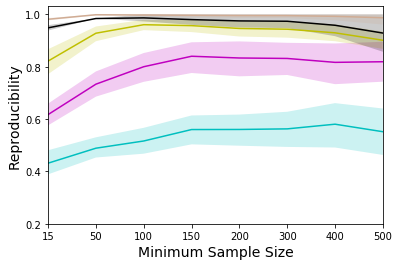

In [6]:
# check association with sample size of single dataset
N_list = [15, 50, 100, 150, 200, 300, 400, 500]
d_list = [0, 0.2, 0.4, 0.6, 0.8] # based on the overall meta with all datasets
orig_meta_f = u'./doc/sum_asy_meta.csv'
orig_meta_dat = pd.read_csv(orig_meta_f)
orig_meta_dat[u'estimate_abs'] = np.abs(orig_meta_dat[u'estimate'])

irr_n_mat = np.zeros((len(d_list),len(N_list))) # intrinsic reproducibility

color_list = ['c', 'm', 'y', 'k', 'pink']

for j, ef in enumerate(d_list):
    if ef<d_list[-1]:
        ef_index = (orig_meta_dat[u'estimate_abs']>ef) & (orig_meta_dat[u'estimate_abs']<d_list[j+1])
    else:
        ef_index = orig_meta_dat[u'estimate_abs']>ef
    ef_sz_tmp = []
    for i,sz in enumerate(N_list):
        if sz<N_list[-1]:
            #sz_index = (dataset_info[u'N']>=sz) & (dataset_info[u'N']<N_list[i+1])
            sz_index = (dataset_info[u'N']>=sz)
        else:
            sz_index = dataset_info[u'N']>=sz
        print(np.sum(sz_index))
        tmp = dataset_by_region_mat[sz_index,:][:,ef_index]
        #print(tmp.mean(axis=0).shape)
        ef_sz_tmp.append(tmp.mean(axis=0))
        irr_n_mat[j,i] = tmp.mean(axis=0).mean()
    
    ef_sz_tmp = np.array(ef_sz_tmp)
    print(ef_sz_tmp.shape)
    sns.tsplot(data=ef_sz_tmp.T, ci=[95], color=color_list[j])    
    plt.xticks(range(len(N_list)), ['15','50','100','150','200','300','400','500'])
    plt.xlabel("Minimum Sample Size", fontsize=14)
    plt.ylabel("Reproducibility", fontsize=14)
    plt.yticks((0.2, 0.4, 0.6, 0.8, 1.0))

plt.show()
#plt.savefig('Fig_new_effect_size.tif',dpi=600,bbox_inches='tight')
#plt.imshow(irr_n_mat)
#plt.show()


In [7]:
# save region-wide results
#orig_meta_dat['RR'] = dataset_by_region_mat.mean(axis=0)
#orig_meta_dat.to_csv('orig_meta_plus_rr.csv', index=False)


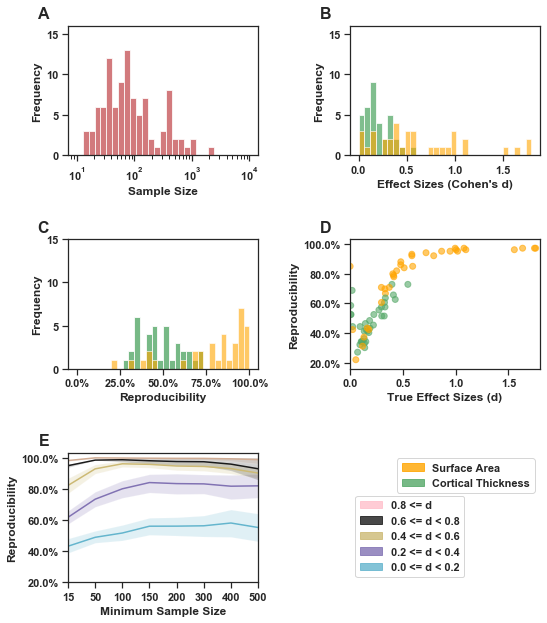

In [8]:
# Create Figure 1 in the manuscript
d_list = [0, 0.2, 0.4, 0.6, 0.8]
N_list = [15, 50, 100, 150, 200, 300, 400, 500]

sns.set(style="ticks")
plt.rcParams.update({'font.size': 20, 'font.weight':'bold','axes.labelweight':'bold'})

# plot histgram of sample sizes
fig = plt.figure(figsize=(8,9.1))

ax = fig.add_subplot(3,2,1)
ax.text(-0.1, 1.15, 'A', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
plt.hist(dataset_info[u'N'].dropna(how='any'), alpha=0.75, bins=np.logspace(1, 4, 30), facecolor='r')
plt.gca().set_xscale("log")
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.ylim((0,16))
#plt.title('Histogram of Sample Sizes')

# plot histgram of effect sizes
ax = fig.add_subplot(3,2,2)
ax.text(-0.1, 1.15, 'B', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
#plt.hist(meta_dat[u'estimate'].abs(), alpha=0.75, bins=30, facecolor='orange')
thick_index = [False,True]+[True]*34+[False]*34
area_index = [True,False]+[False]*34+[True]*34
plt.hist(meta_dat[u'estimate_abs'][thick_index], facecolor='g', alpha=0.75, range=(0,1.8), bins=30)
plt.hist(meta_dat[u'estimate_abs'][area_index], facecolor='orange', alpha=0.6, range=(0,1.8), bins=30)

plt.xlabel('Effect Sizes (Cohen\'s d)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.ylim((0,16))
#plt.title('Histogram of Effect Size')


from matplotlib.ticker import FuncFormatter
import matplotlib
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

# plot histgram of reprudicibility 
ax = fig.add_subplot(3,2,3)
ax.text(-0.1, 1.15, 'C', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
thick_index = [False,True]+[True]*34+[False]*34
area_index = [True,False]+[False]*34+[True]*34

irr_out_dat = dataset_by_region_mat.mean(axis=0)
plt.hist(irr_out_dat[thick_index].astype(float), facecolor='g', alpha=0.8, range=(0,1), bins=30)
plt.hist(irr_out_dat[area_index].astype(float), facecolor='orange', alpha=0.6, range=(0,1), bins=30)
plt.xlabel('Reproducibility', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylim((0,15))
plt.xticks(np.arange(0, 1.01, step=0.25)) ###
#plt.title('Histogram of Reproducibility Rate')
formatter = FuncFormatter(to_percent)
plt.gca().xaxis.set_major_formatter(formatter)

# plot scatter plot of effect sizes (abs.) and reproducibility 
ax = fig.add_subplot(3,2,4)
ax.text(-0.1, 1.15, 'D', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
colors = ['orange','g']+['g']*34+['orange']*34
plt.scatter(meta_dat[u'estimate'].abs(), irr_out_dat, color=colors, alpha=0.6)
plt.xlabel('True Effect Sizes (d)', fontsize=12)
plt.xlim((0, 1.8))
plt.ylabel('Reproducibility',fontsize=12)
plt.yticks((0.2, 0.4, 0.6, 0.8, 1.0))
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

# color block for group of each sample size level and effect size level 
#plt.subplot(3,2,5)

# time series plot for reproducibility for each sample size and effect size level
ax = fig.add_subplot(3,2,5)
ax.text(-0.1, 1.15, 'E', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
color_list = ['c', 'm', 'y', 'k', 'pink']
for j, ef in enumerate(d_list):
    if ef<d_list[-1]:
        ef_index = (orig_meta_dat[u'estimate_abs']>ef) & (orig_meta_dat[u'estimate_abs']<d_list[j+1])
    else:
        ef_index = orig_meta_dat[u'estimate_abs']>ef
    ef_sz_tmp = []
    for i,sz in enumerate(N_list):
        if sz<N_list[-1]:
            #sz_index = (dataset_info[u'N']>=sz) & (dataset_info[u'N']<N_list[i+1])
            sz_index = (dataset_info[u'N']>=sz)
        else:
            sz_index = dataset_info[u'N']>=sz
            
        tmp = dataset_by_region_mat[sz_index,:][:,ef_index]
        #print(tmp.mean(axis=0).shape)
        ef_sz_tmp.append(tmp.mean(axis=0))
        irr_n_mat[j,i] = tmp.mean(axis=0).mean()
    
    ef_sz_tmp = np.array(ef_sz_tmp)
    #print(ef_sz_tmp.shape)
    sns.tsplot(data=ef_sz_tmp.T, ci=[95], color=color_list[j])    
    plt.xticks(range(len(N_list)), ['15','50','100','150','200','300','400','500'])
    plt.xlabel("Minimum Sample Size", fontsize=12)
    plt.ylabel("Reproducibility", fontsize=12)
    plt.yticks((0.2, 0.4, 0.6, 0.8, 1.0))
#plt.title("Reproducibility Changes with \n Sample Size and Actual Effect Size", fontsize=14)

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

# color legends
plt.subplot(3,2,6)
import matplotlib.patches as mpatches
plt.axis('off')
#all_patch = mpatches.Patch(label='All', alpha=0.80)
red_patch = mpatches.Patch(color='orange', label='Surface Area', alpha=0.80)
green_patch = mpatches.Patch(color='g', label='Cortical Thickness', alpha=0.80)
first_legend = plt.legend(handles=[red_patch, green_patch], loc='upper right')
ax = plt.gca().add_artist(first_legend)

c_patch = mpatches.Patch(color='c', label='0.0 <= d < 0.2', alpha=0.80)
m_patch = mpatches.Patch(color='m', label='0.2 <= d < 0.4', alpha=0.80)
y_patch = mpatches.Patch(color='y', label='0.4 <= d < 0.6', alpha=0.80)
k_patch = mpatches.Patch(color='k', label='0.6 <= d < 0.8', alpha=0.80)
w_patch = mpatches.Patch(color='pink', label='0.8 <= d', alpha=0.80)
plt.legend(handles=[c_patch, m_patch, y_patch, k_patch, w_patch][::-1], loc='lower left')

plt.tight_layout()
plt.show()
#plt.savefig('Fig0_py3_1vs98.tif',dpi=600,bbox_inches='tight')



In [10]:
# Check results for subgroups regarding to FS version, SCanner field, and Age
dataset_info_file = './doc/dataset_info.csv'
dataset_info = pd.read_csv(dataset_info_file)

print(dataset_info[dataset_info['FSVersion0']=='5.3']['N'].mean())
print(dataset_info[dataset_info['FSVersion0']=='5.1']['N'].mean())
print(ttest_ind(dataset_info[dataset_info['FSVersion0']=='5.3']['N'], 
                dataset_info[dataset_info['FSVersion0']=='5.1']['N']))
print(mannwhitneyu(dataset_info[dataset_info['FSVersion0']=='5.3']['N'], 
                dataset_info[dataset_info['FSVersion0']=='5.1']['N'],
                  alternative='two-sided'))

print(dataset_info[dataset_info['ScannerField0']=='3']['N'].mean())
print(dataset_info[dataset_info['ScannerField0']=='1.5']['N'].mean())
print(ttest_ind(dataset_info[dataset_info['ScannerField0']=='3']['N'], 
                dataset_info[dataset_info['ScannerField0']=='1.5']['N']))
print(mannwhitneyu(dataset_info[dataset_info['ScannerField0']=='3']['N'], 
                dataset_info[dataset_info['ScannerField0']=='1.5']['N'],
                  alternative='two-sided'))

print(dataset_info[dataset_info['AgeMax']<=18]['N'].mean())
print(dataset_info[dataset_info['AgeMin']>18]['N'].mean())
print(ttest_ind(dataset_info[dataset_info['AgeMax']<=18]['N'], 
                dataset_info[dataset_info['AgeMin']>18]['N']))
print(mannwhitneyu(dataset_info[dataset_info['AgeMax']<=18]['N'], 
                dataset_info[dataset_info['AgeMin']>18]['N'],
                  alternative='two-sided'))


166.72527472527472
203.0
Ttest_indResult(statistic=-0.2922776781289949, pvalue=0.7707116844006019)
MannwhitneyuResult(statistic=203.0, pvalue=0.2979379639513542)
128.95238095238096
160.44827586206895
Ttest_indResult(statistic=-0.7785307167080221, pvalue=0.43829829438487744)
MannwhitneyuResult(statistic=733.0, pvalue=0.13032663255330015)
82.0
153.91666666666666
Ttest_indResult(statistic=-1.4051171794968018, pvalue=0.16593264052547724)
MannwhitneyuResult(statistic=300.5, pvalue=0.6729516836406945)


In [11]:
print(dataset_info.columns)

Index(['DatasetName', 'Dataset', 'N', 'Male', 'Female', 'Right', 'Left',
       'AgeMin', 'AgeMax', 'AgeMed', 'ICVMin', 'ICVMax', 'ICVMed', 'File',
       'MaleProp', 'RightProp', 'FSVersion0', 'ScannerField0'],
      dtype='object')


In [12]:
orig_meta_dat

Region  DOF      Tau2    Tau2SE         I2  \
0                  Asy_L_SurfArea_asy.csv   95  0.066257  0.011978  91.857233   
1                 Asy_L_Thickness_asy.csv   96  0.107421  0.017963  95.051892   
2                  bankssts_asy_thick.csv   96  0.066084  0.012052  91.165866   
3   caudalanteriorcingulate_asy_thick.csv   96  0.086882  0.014988  93.523356   
4       caudalmiddlefrontal_asy_thick.csv   96  0.095195  0.016157  94.394127   
..                                    ...  ...       ...       ...        ...   
65             supramarginal_asy_area.csv   96  0.043924  0.008594  87.617011   
66               frontalpole_asy_area.csv   96  0.022141  0.006384  64.450985   
67              temporalpole_asy_area.csv   96  0.031234  0.006976  81.031672   
68        transversetemporal_asy_area.csv   96  0.024549  0.007060  64.424736   
69                    insula_asy_area.csv   96  0.056227  0.010326  90.746050   

           H2  Qdf            Q             Qp  estimate        se       zval  \
0   12.280837   95   971.862758  7.041231e-146 -0.334247  0.029588 -11.296675   
1   20.209744   96  1397.289539  1.971316e-230  0.131366  0.036019   3.647105   
2   11.319729   96  1296.769230  4.141526e-210 -0.427247  0.029629 -14.419808   
3   15.440095   96  1619.771822  9.181386e-276  0.328639  0.032938   9.977371   
4   17.838435   96  1482.485717  9.729985e-248  0.109901  0.034185   3.214938   
..        ...  ...          ...            ...       ...       ...        ...   
65   8.075595   96  1012.475146  2.304515e-153  0.414185  0.025154  16.466290   
66   2.813017   96   254.181824   1.844258e-16 -1.633192  0.022626 -72.183392   
67   5.271946   96   642.374377   3.686585e-82  0.869906  0.022931  37.936126   
68   2.810942   96   338.490677   4.857909e-29  1.759420  0.023761  74.047357   
69  10.806196   96   983.958511  9.532445e-148 -0.184234  0.027440  -6.714174   

            pval     ci.lb     ci.ub  estimate_abs  
0   1.362800e-29 -0.392238 -0.276255      0.334247  
1   2.652114e-04  0.060770  0.201963      0.131366  
2   3.884207e-47 -0.485319 -0.369175      0.427247  
3   1.914729e-23  0.264081  0.393198      0.328639  
4   1.304726e-03  0.042901  0.176902      0.109901  
..           ...       ...       ...           ...  
65  6.408199e-61  0.364885  0.463485      0.414185  
66  0.000000e+00 -1.677538 -1.588847      1.633192  
67  0.000000e+00  0.824963  0.914850      0.869906  
68  0.000000e+00  1.712849  1.805990      1.759420  
69  1.891345e-11 -0.238015 -0.130454      0.184234  

[70 rows x 16 columns]